In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [80]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
3,1521,3,75.0
18,2770,3,102.0
17,1540,3,60.0
9,3700,5,167.0
7,3300,4,155.0


In [81]:
sx = df.drop('price', axis = 'columns')

In [82]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
scaled_X = sx.fit_transform(df)
scaled_X 

array([[0.08827586, 0.25      , 0.05237037],
       [0.62068966, 0.75      , 0.65185185],
       [0.22068966, 0.5       , 0.22222222],
       [0.24862069, 0.5       , 0.31851852],
       [0.13793103, 0.25      , 0.14074074],
       [0.12758621, 0.25      , 0.04444444],
       [0.6662069 , 0.75      , 0.76296296],
       [0.86206897, 0.75      , 0.91111111],
       [0.17586207, 0.5       , 0.13333333],
       [1.        , 1.        , 1.        ],
       [0.34482759, 0.5       , 0.37037037],
       [0.68448276, 0.75      , 0.8       ],
       [0.06896552, 0.25      , 0.04444444],
       [0.10344828, 0.25      , 0.05925926],
       [0.5       , 0.5       , 0.51111111],
       [0.12931034, 0.25      , 0.07407407],
       [0.13103448, 0.5       , 0.11851852],
       [0.25517241, 0.5       , 0.20740741],
       [0.67931034, 0.5       , 0.51851852],
       [0.        , 0.        , 0.        ]])

In [83]:
scaled_y = sx.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [84]:
def batch_gradient_descent(X,y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w, scaled_X.T) + b # w1 *area+w2* bedrooms
        w_grad = -(2/total_samples) * (X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples) *np.sum(y_true-y_predicted)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        (y_true, y_predicted)
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b, cost, cost_list, epoch_list

w,b,cost,cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)

w,b,cost
        

(array([0.4578585 , 0.50176605, 0.42760978]),
 -0.21656557527632514,
 0.006609989204364383)

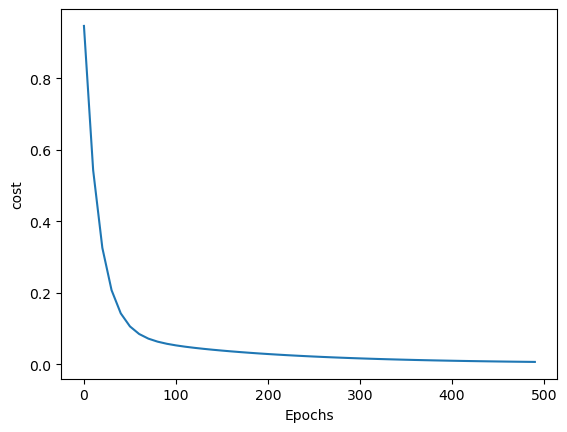

In [92]:
plt.xlabel("Epochs")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [86]:
w

array([0.4578585 , 0.50176605, 0.42760978])

In [87]:
sx.transform ([[2600,4]])

ValueError: X has 2 features, but MinMaxScaler is expecting 1 features as input.

In [ ]:
sy.inverse_transform([[1],[0]])


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
def predict(area, bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])




In [ ]:
predict(2600,2,w,b)

ValueError: X has 2 features, but MinMaxScaler is expecting 1 features as input.

In [ ]:
import random

In [88]:
 def stochastic_gradient_descent(X,y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0, total_samples - 1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b # w1 *area+w2* bedrooms
        w_grad = -(2/total_samples) * (X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples) *np.sum(y_true-y_predicted)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        (y_true, y_predicted)
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b, cost, cost_list, epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)

w_sgd,b_sgd,cost_sgd
        

(array([1.48072065, 1.10668401, 1.58259486]),
 -1.1976964334939026,
 1.168712506865267)

In [89]:
w,b,cost

(array([0.4578585 , 0.50176605, 0.42760978]),
 -0.21656557527632514,
 0.006609989204364383)

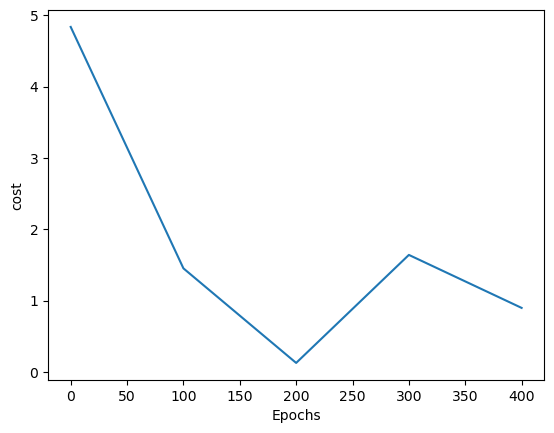

In [91]:

plt.xlabel("Epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [93]:
predict(2600,2,w_sgd,b_sgd)

ValueError: X has 2 features, but MinMaxScaler is expecting 1 features as input.